# Data Science Intern at Let's Grow More LGMVIP
## Develop A Neural Network That Can Read Handwriting
Paulyna Magana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

## Loading dataset

In [2]:
mnist= tf.keras.datasets.mnist

### Dividing the images into x_train and x_test sets

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Print the data set images, which needed to be identified by the neural network

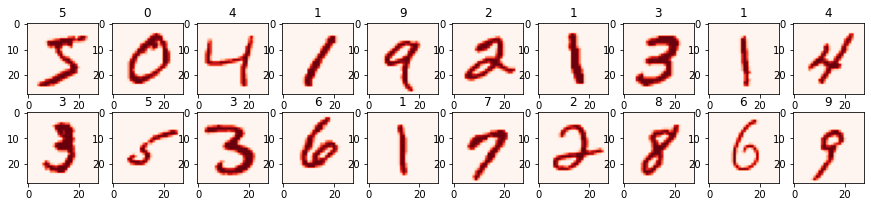

In [4]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

### Normalizing the matrix array of number images

In [5]:
xtrain = x_train/255.0
xtest = x_test/255.0

### Flattening the 2-dimensional array

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

2022-01-30 21:02:34.975000: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Using Adam optimizer

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

#### Fitting of the training data

- 5 iterations

In [9]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2573 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1143 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0461 - accuracy: 0.9854


98% Accuracy achieved with 5 iterations

- Fitting of the training data into the model for 9 iterations

In [10]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9884
Epoch 2/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9905
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9935
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 8/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - accuracy: 0.9971


99% Accuracy achieved with 9 iterations

In [11]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 23.2301 - accuracy: 0.9749
[23.23012924194336, 0.9749000072479248]


97 % of total accuracy of our neural network

In [12]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 5.7161 - accuracy: 0.9883 - val_loss: 2.6494 - val_accuracy: 0.9937
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.1492 - accuracy: 0.9938 - val_loss: 2.4290 - val_accuracy: 0.9925
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.7730 - accuracy: 0.9947 - val_loss: 2.5401 - val_accuracy: 0.9932
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.9312 - accuracy: 0.9944 - val_loss: 3.2200 - val_accuracy: 0.9923
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.8607 - accuracy: 0.9946 - val_loss: 3.2331 - val_accuracy: 0.9927
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.1582 - accuracy: 0.9946 - val_loss: 2.0838 - val_accuracy: 0.9935
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.4288 - accuracy: 0.9954 - val_loss: 3.2917 - val_accuracy:

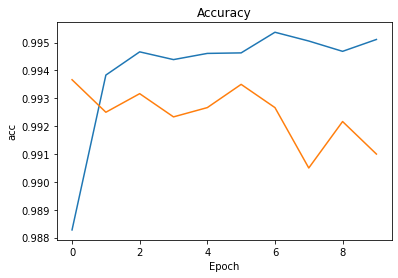

In [13]:
# Plot Accuracy
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

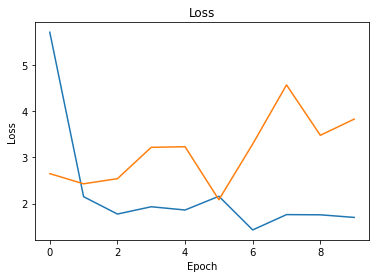

In [14]:
# Plot Loss
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

#### Testing the model

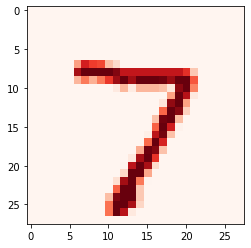

In [15]:
# Number to predict
plt.imshow(np.squeeze(x_test[0]),cmap="Reds")

In [17]:
#Prediction
prediction=model.predict(x_test)
print( "The number is: ", np.argmax(prediction[0]))

The number is:   7


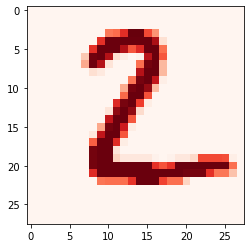

In [19]:
# Number to predict
plt.imshow(np.squeeze(x_test[1]),cmap="Reds")

In [18]:
#Prediction
prediction=model.predict(x_test)
print("The number is: ", np.argmax(prediction[1]))

The number is:  2


By: Paulyna Magaña